# DATA EXPLORATION PHASE

In [1]:
import pandas as pd

In [2]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
diabetes.shape

(768, 9)

In [5]:
diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
diabetes.count()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

In [9]:
diabetes['Age'].describe()

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

In [10]:
#df['grade'], cut_bin = pd.qcut(df['score'], q = 3, labels = ['C', 'B', 'A'], retbins = True)
#df.head()

In [11]:
# bins = [0, 50, 80, 100]
# labels = ['C', 'B', 'A']
# df['grade'] = pd.cut(x = df['score'], bins = bins, labels = labels, include_lowest = True)

# DATA CLEANING PHASE

In [12]:
diabetes = diabetes.sort_values('Outcome')

In [13]:
bins = [20, 30, 40, 50, 60, 70, 81]
labels = ['20-30', '30-40', '40-50', '50-60', '60-70', '70-81']
diabetes['age_range'] = pd.cut(x = diabetes['Age'], bins=bins, labels=labels, include_lowest=False)

In [14]:
diabetes['Outcome'] = diabetes['Outcome'].replace([0, 1], ['Non-Diabetic', 'Diabetic'])

In [15]:
# df['age_range'], cut_bin = pd.qcut(df['Age'], q = 6, labels = ['21-30', '31-40', '41-50', '51-60', '61-70', '71-81'], retbins = True)
# df.head(50)

In [16]:
# df.drop(['age_range'], axis=1)

# DATA ANALYSIS AND VISUALIZATION PHASE

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

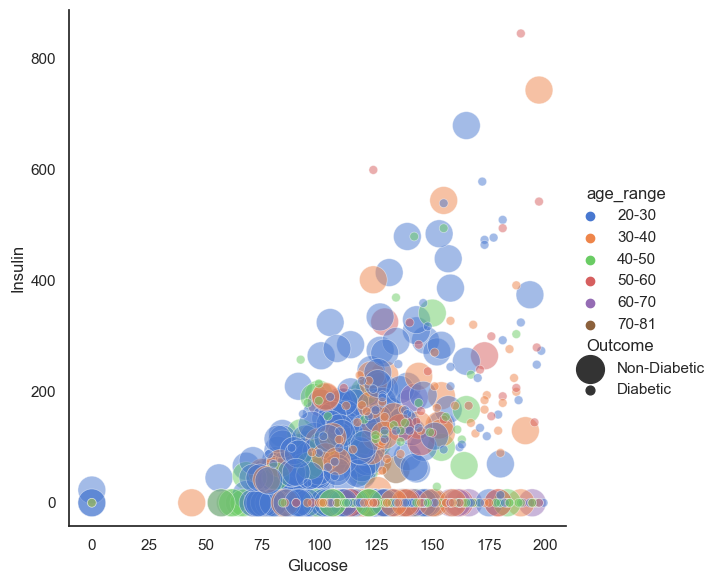

In [18]:
sns.set_theme(style="white")

sns.relplot(x="Glucose", y="Insulin", hue="age_range", size="Outcome",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=diabetes)

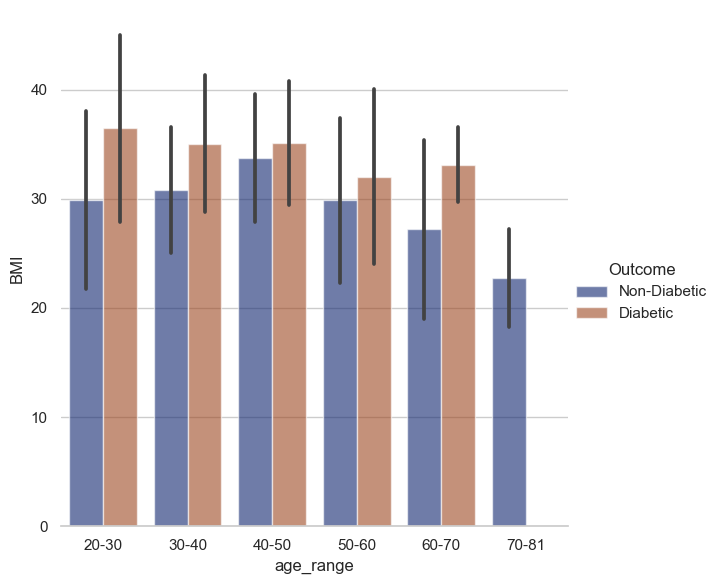

In [19]:
sns.set_theme(style="whitegrid")

g = sns.catplot(
    data=diabetes, kind="bar",
    x="age_range", y="BMI", hue="Outcome",
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)

In [20]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age_range
383,1,90,62,18,59,25.1,1.268,25,Non-Diabetic,20-30
465,0,124,56,13,105,21.8,0.452,21,Non-Diabetic,20-30
466,0,74,52,10,36,27.8,0.269,22,Non-Diabetic,20-30
467,0,97,64,36,100,36.8,0.600,25,Non-Diabetic,20-30
469,6,154,78,41,140,46.1,0.571,27,Non-Diabetic,20-30
...,...,...,...,...,...,...,...,...,...,...
193,11,135,0,0,0,52.3,0.578,40,Diabetic,30-40
485,0,135,68,42,250,42.3,0.365,24,Diabetic,20-30
484,0,145,0,0,0,44.2,0.630,31,Diabetic,30-40
186,8,181,68,36,495,30.1,0.615,60,Diabetic,50-60


Create a plot with multiple parameters, and show all column names in it and analyze it like: Pregnancies higher it is more diabetes or something

In [21]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age_range
383,1,90,62,18,59,25.1,1.268,25,Non-Diabetic,20-30
465,0,124,56,13,105,21.8,0.452,21,Non-Diabetic,20-30
466,0,74,52,10,36,27.8,0.269,22,Non-Diabetic,20-30
467,0,97,64,36,100,36.8,0.600,25,Non-Diabetic,20-30
469,6,154,78,41,140,46.1,0.571,27,Non-Diabetic,20-30
...,...,...,...,...,...,...,...,...,...,...
193,11,135,0,0,0,52.3,0.578,40,Diabetic,30-40
485,0,135,68,42,250,42.3,0.365,24,Diabetic,20-30
484,0,145,0,0,0,44.2,0.630,31,Diabetic,30-40
186,8,181,68,36,495,30.1,0.615,60,Diabetic,50-60


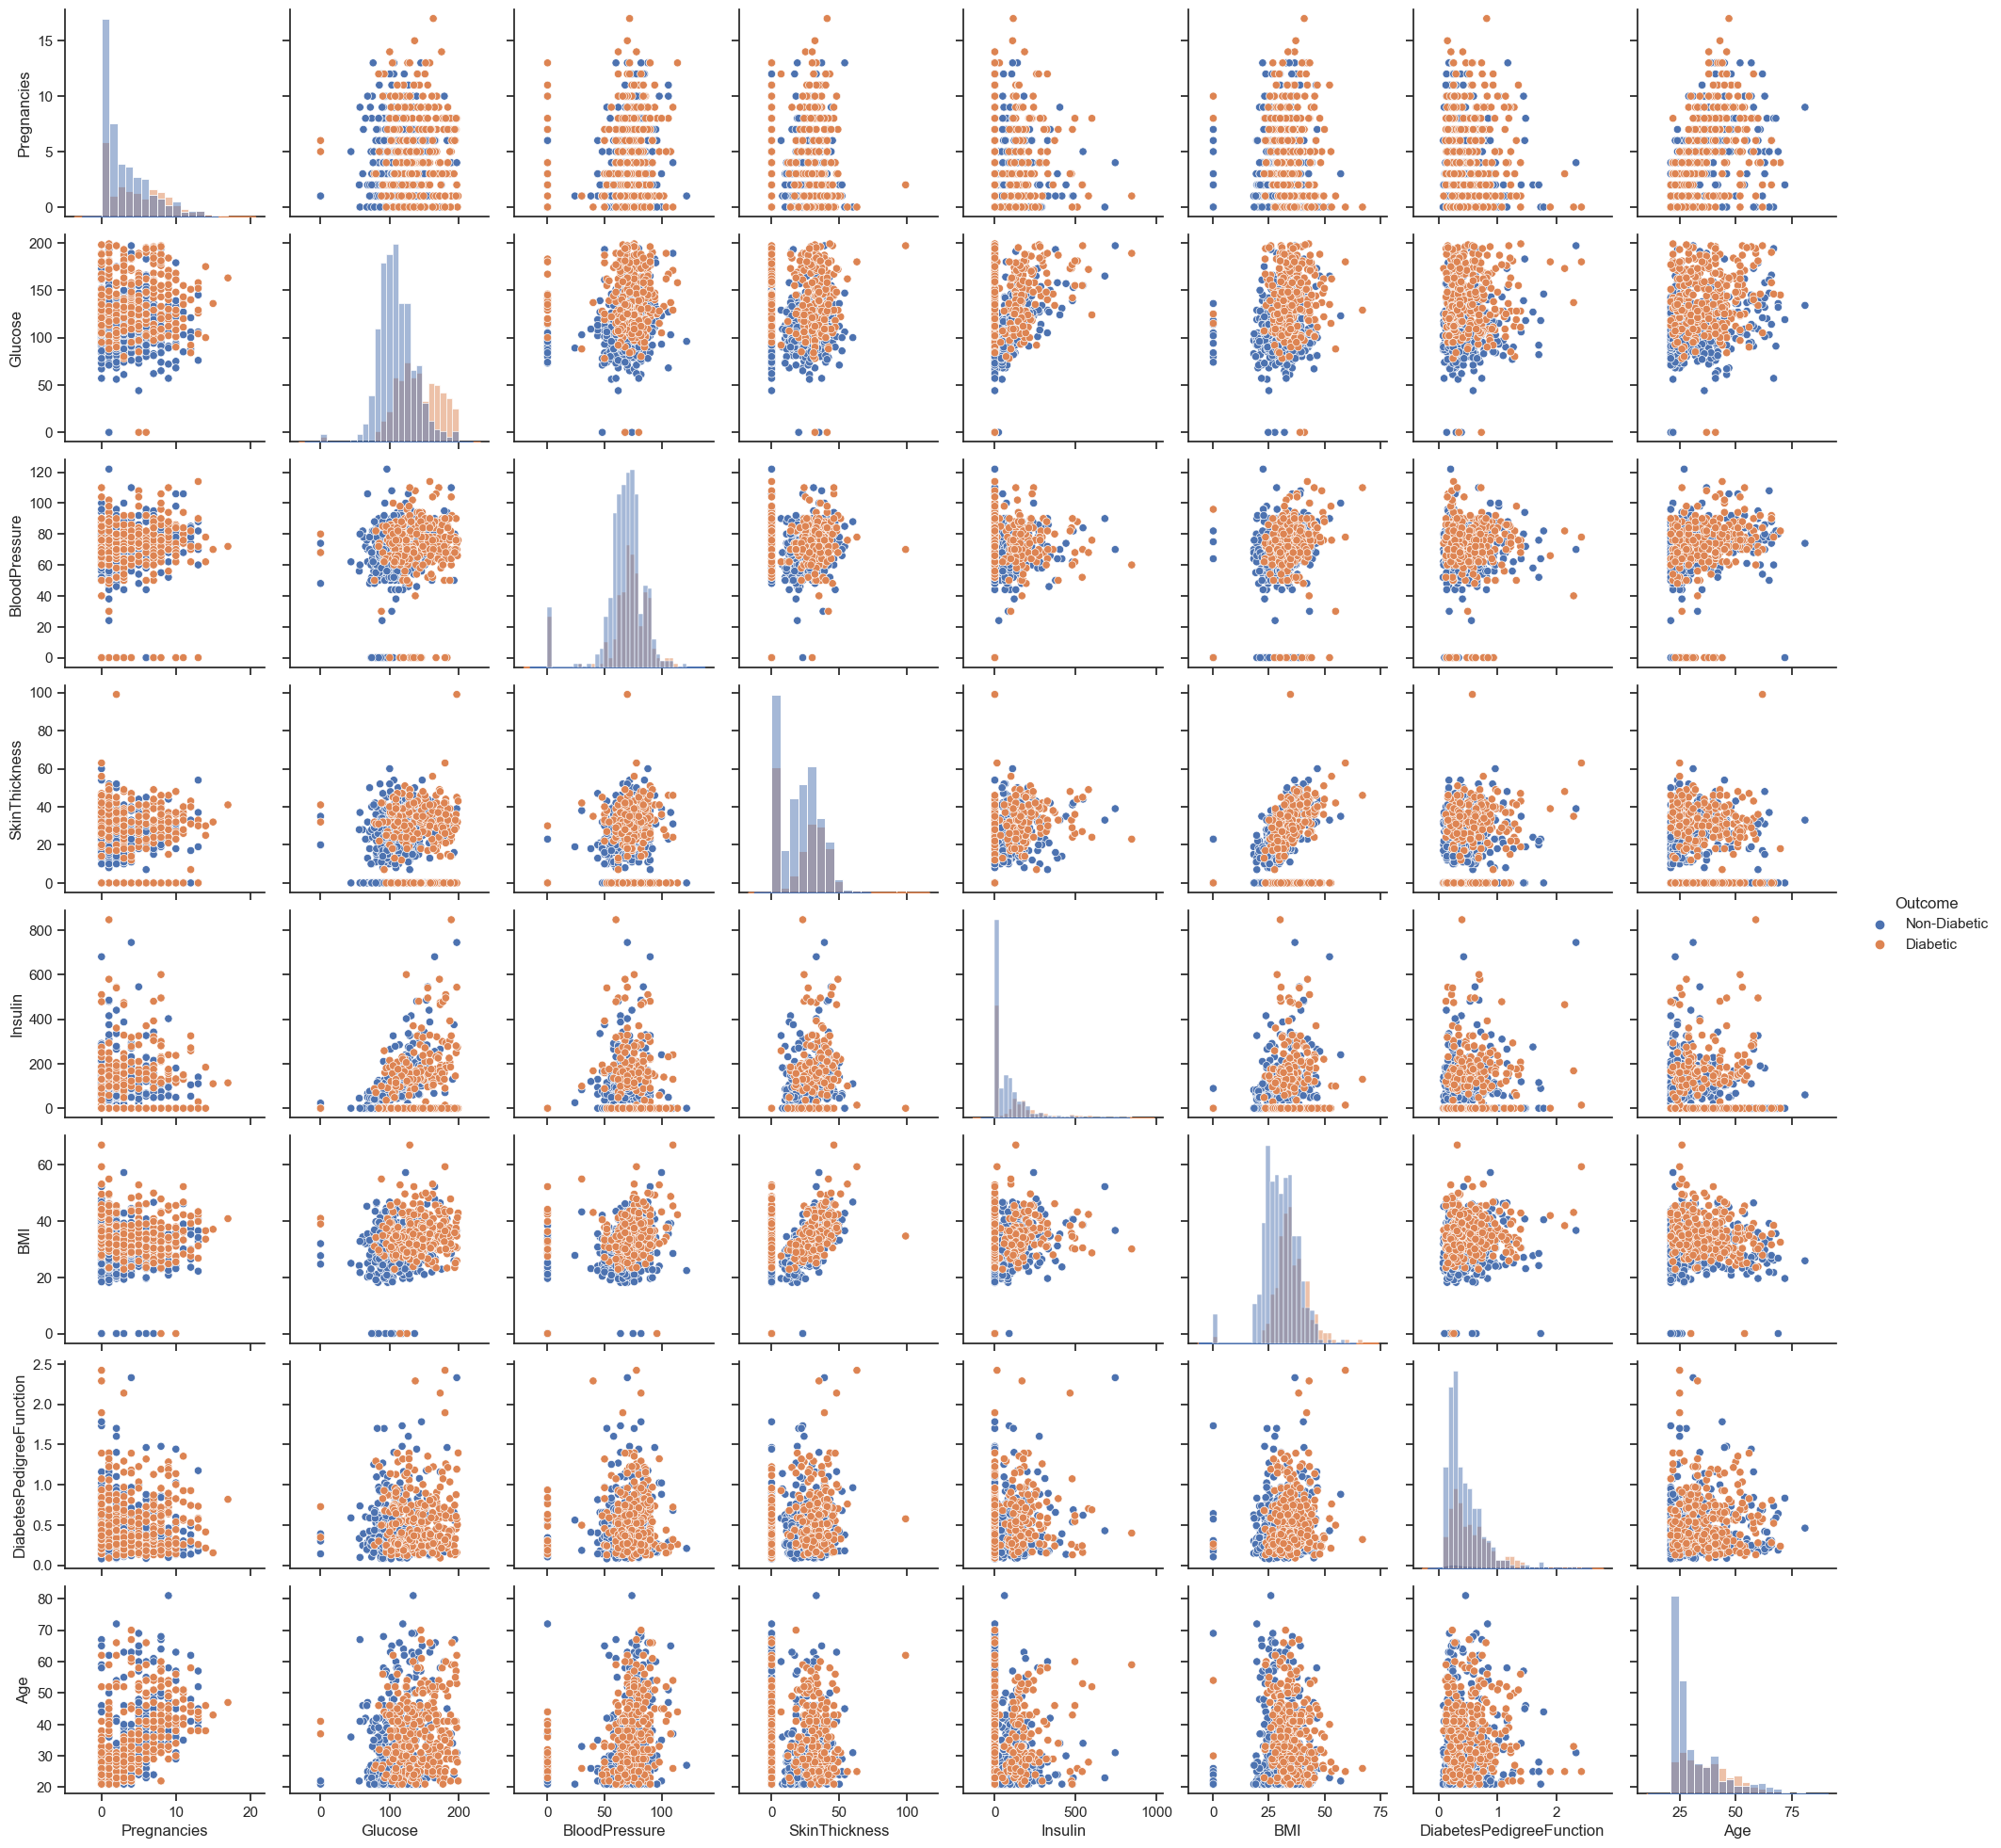

In [22]:
sns.set_theme(style="ticks")

g = sns.pairplot(diabetes, hue="Outcome")
g.map_diag(sns.histplot)

<AxesSubplot:>

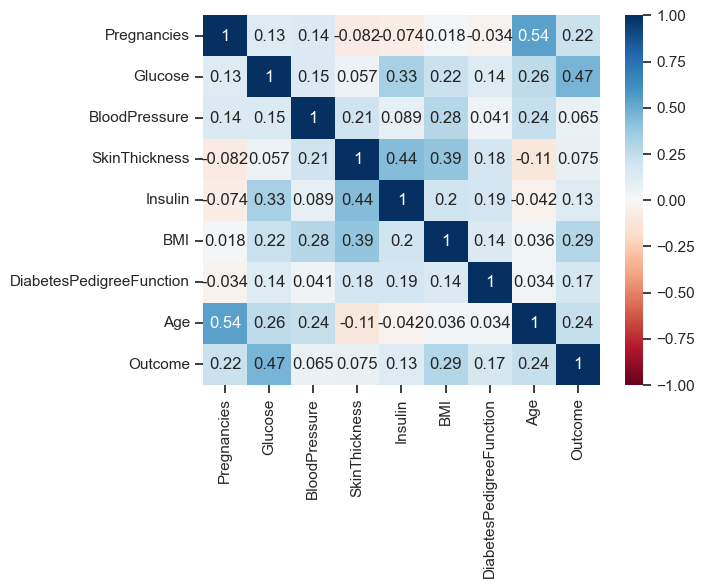

In [23]:
corr_diabetes_base = diabetes
corr_diabetes_base['Outcome'] = corr_diabetes_base['Outcome'].replace(['Non-Diabetic', 'Diabetic'], [0, 1])
corr = corr_diabetes_base.corr()

sns.heatmap(corr, cmap='RdBu', vmin=-1, vmax=1, annot=True)

In [24]:
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [25]:
diabetes['Outcome'] = diabetes['Outcome'].replace([0, 1], ['Non-Diabetic', 'Diabetic'])

In [26]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age_range
383,1,90,62,18,59,25.1,1.268,25,Non-Diabetic,20-30
465,0,124,56,13,105,21.8,0.452,21,Non-Diabetic,20-30
466,0,74,52,10,36,27.8,0.269,22,Non-Diabetic,20-30
467,0,97,64,36,100,36.8,0.600,25,Non-Diabetic,20-30
469,6,154,78,41,140,46.1,0.571,27,Non-Diabetic,20-30
...,...,...,...,...,...,...,...,...,...,...
193,11,135,0,0,0,52.3,0.578,40,Diabetic,30-40
485,0,135,68,42,250,42.3,0.365,24,Diabetic,20-30
484,0,145,0,0,0,44.2,0.630,31,Diabetic,30-40
186,8,181,68,36,495,30.1,0.615,60,Diabetic,50-60


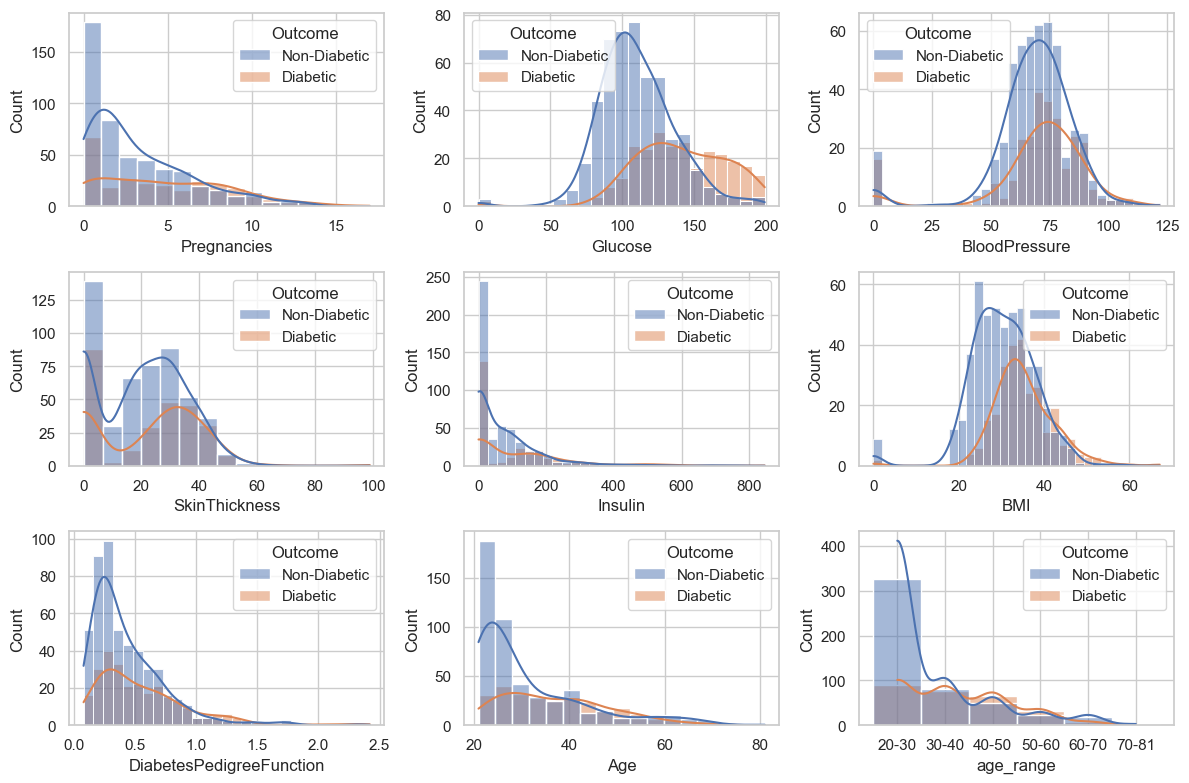

In [27]:
sns.set(style="whitegrid")
fig,axs = plt.subplots(3,3, figsize = (12,8))

sns.histplot(data=diabetes, x="Pregnancies", kde=True, color="skyblue", ax=axs[0, 0], hue='Outcome')
sns.histplot(data=diabetes, x="Glucose", kde=True, color="olive", ax=axs[0, 1], hue='Outcome')
sns.histplot(data=diabetes, x="BloodPressure", kde=True, color="gold", ax=axs[0, 2], hue='Outcome')
sns.histplot(data=diabetes, x="SkinThickness", kde=True, color="teal", ax=axs[1, 0], hue='Outcome')
sns.histplot(data=diabetes, x="Insulin", kde=True, color="teal", ax=axs[1, 1], hue='Outcome')
sns.histplot(data=diabetes, x="BMI", kde=True, color="blue", ax=axs[1, 2], hue='Outcome')
sns.histplot(data=diabetes, x="DiabetesPedigreeFunction", kde=True, color="purple", ax=axs[2,0], hue='Outcome')
sns.histplot(data=diabetes, x="Age", kde=True, color="purple", ax=axs[2,1], hue='Outcome')
sns.histplot(data=diabetes, x="age_range", kde=True, color="purple", ax=axs[2,2], hue='Outcome')

fig.tight_layout()